# Group-based Classification Models

### Importing libraries and define functions

In [1]:
import pandas as pd
import numpy as np
import scipy
import math
import os
import sys

In [2]:
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [3]:
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
from pycaret.classification import *

In [5]:
import functions as f

# Quantum dots classification model

In [6]:
model_name = "quantum_dot"
group_name = "quantum_dots"
seed = 123

### Load the data and filter instances

In [7]:
data_train_df = pd.read_csv("output/datasets/universal/data_classification_train_df.csv", encoding="utf-8")
data_test_df = pd.read_csv("output/datasets/universal/data_classification_test_df.csv", encoding="utf-8")
data_df = pd.concat([data_train_df,data_test_df])

del data_train_df
del data_test_df

In [8]:
data_df.shape

(11315, 20)

In [9]:
data_group_df = data_df[data_df['nanomaterial_group'] == group_name]

In [10]:
data_group_df.shape

(3013, 20)

In [11]:
data_group_df.head()

,NP_type,Coating,core_size_nm,hydro_size_nm,Surf_charge_mV,Surface_area_m2_g,shape,Dose_microg_mL,Duration_h,Cell_name,Cell_species,cell_Organ,Cell_morphology,Cell_age,cell_type,sex,Assay,Test_indicator,nanomaterial_group,viability_class
0,CdTe,Ganciclovir,3.90,NaN,NaN,NaN,NaN,1.00,96.0,HeLa,Human,Cervix,Epithelial,Adult,cancer,female,MTT,TetrazoliumSalt,quantum_dots,Toxic
2,CdSe,None,2.77,NaN,NaN,NaN,NaN,9.04,100.0,T-Thermophila-BF5,Protozoa,Microorganism,Somatic,NaN,Normal,NaN,Others,NaN,quantum_dots,Toxic
5,CdSeTe,HSV_TK_based,12.00,NaN,NaN,NaN,NaN,0.03,96.0,HL-7702,Human,Liver,Hepatocyte,NaN,Normal,NaN,MTT,TetrazoliumSalt,quantum_dots,NonToxic
11,CdTe,GSH,3.70,NaN,NaN,NaN,NaN,1.55,4.0,Erythrocyte,Rabbit,Blood,Erythrocyte,NaN,Normal,NaN,Hemolysis,NaN,quantum_dots,NonToxic
15,CdSe,None,7.00,NaN,NaN,NaN,NaN,1.00,24.0,A549,Human,Lung,Epithelial,Adult,cancer,male,LDH,LDHrelease,quantum_dots,NonToxic


### Create training set and test set

In [12]:
splitter = setup(data = data_group_df, target = 'viability_class',
                 preprocess = False,
                 train_size=0.8,
                 data_split_stratify=True,
                 # don't change the following
                 session_id = seed,
                 use_gpu=False,
                 log_experiment = False,
                 silent=True,
                 experiment_name = 'splitter')

,Description,Value
0,session_id,123
1,Target,viability_class
2,Target Type,Binary
3,Label Encoded,"NonToxic: 0, Toxic: 1"
4,Original Data,"(3013, 20)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,15
8,Transformed Train Set,"(2410, 17)"
9,Transformed Test Set,"(603, 17)"


In [13]:
data_group_train_df = get_config(variable="X_train").copy()
data_group_train_df['viability_class'] = get_config(variable="y_train").copy()

data_group_test_df = get_config(variable="X_test").copy()
data_group_test_df['viability_class'] = get_config(variable="y_test").copy()

In [14]:
print(data_group_train_df.shape)
print(data_group_test_df.shape)

(2410, 18)
(603, 18)


In [15]:
print(data_group_train_df['viability_class'].value_counts())
print(data_group_test_df['viability_class'].value_counts())

0    1780
1     630
Name: viability_class, dtype: int64
0    445
1    158
Name: viability_class, dtype: int64


### Save cleaned datasets

In [16]:
data_group_train_df.to_csv('output/datasets/'+model_name+'/data_classification_'+model_name+'_train_df.csv', encoding='utf-8', index=False)

In [17]:
data_group_test_df.to_csv('output/datasets/'+model_name+'/data_classification_'+model_name+'_test_df.csv', encoding='utf-8', index=False)

### Use the best scenario identified in step 01

In [18]:
sc_ignore_features = ['nanomaterial_group', 'Coating', 'Cell_name']
sc_bin_numeric_features = None
sc_high_cardinality_features = None

sc_imputation_type = 'iterative'
sc_numeric_imputation = 'mean'

sc_normalize = True
sc_remove_outliers = True

### Data Preprcoessing

In [19]:
stup = setup(data = data_group_train_df, target = 'viability_class', 
              
        test_data = data_group_test_df,

        imputation_type = sc_imputation_type, 
        numeric_imputation = sc_numeric_imputation, #default: mean

        categorical_imputation = "constant", #default: constant
        iterative_imputation_iters = 5, #default: 5
        numeric_iterative_imputer = "lightgbm",
        categorical_iterative_imputer = "lightgbm",

        ignore_features = sc_ignore_features,
        bin_numeric_features = sc_bin_numeric_features,
        high_cardinality_features = sc_high_cardinality_features,

        high_cardinality_method = "frequency", #default: frequency
        handle_unknown_categorical = True, #default
        unknown_categorical_method = "least_frequent", #default

        normalize = sc_normalize, #default: False
        remove_outliers= sc_remove_outliers, #default: False

        outliers_threshold = 0.05, #default

        transformation= False, #default
        transformation_method = 'yeo-johnson', #default
        combine_rare_levels = False,
        rare_level_threshold = 0.1, #default: 0.1

        remove_multicollinearity = False, #default 
        multicollinearity_threshold = 0.9, #default

        ignore_low_variance = True, 

        feature_interaction = False, 
        feature_ratio = False,
        polynomial_features = False, 
        trigonometry_features = False,

        fix_imbalance = True,
        #fix_imbalance_method = SMOTE, # default
        
        # don't change the following
        session_id = seed,
        use_gpu=False,
        log_experiment = False,
        silent=True,
        experiment_name = model_name)

set_config('seed', seed)

,Description,Value
0,session_id,123
1,Target,viability_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2410, 18)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(2280, 104)
(2280,)


In [21]:
print(get_config(variable="X").shape)
print(get_config(variable="y").shape)

(2410, 104)
(2410,)


In [22]:
set_config('X_train', get_config(variable="X").copy()) 
set_config('y_train', get_config(variable="y").copy()) 

In [23]:
print(get_config(variable="X_train").shape)
print(get_config(variable="y_train").shape)

(2410, 104)
(2410,)


In [24]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


In [25]:
#load_config('output/models/universal_regression_rf.cfg')

In [26]:
data_group_train_transformed_df = get_config(variable="X").copy()
data_group_train_transformed_df['viability_class'] = get_config(variable="y").copy()

In [27]:
data_group_test_transformed_df = get_config(variable="X_test").copy()
data_group_test_transformed_df['viability_class'] = get_config(variable="y_test").copy()

In [28]:
data_group_train_transformed_df.to_csv('output/datasets/'+model_name+'/transformed/data_classification_'+model_name+'_train_transformed_df.csv', encoding='utf-8', index=False)
data_group_test_transformed_df.to_csv('output/datasets/'+model_name+'/transformed/data_classification_'+model_name+'_test_transformed_df.csv', encoding='utf-8', index=False)

### Model Comparison

In [29]:
top_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7975,0.8378,0.6317,0.6127,0.6204,0.4827,0.4840,0.0460
xgboost,Extreme Gradient Boosting,0.7959,0.8347,0.6032,0.6141,0.6068,0.4693,0.4706,0.2850
catboost,CatBoost Classifier,0.7942,0.8312,0.6714,0.5967,0.6310,0.4892,0.4915,5.0370
rf,Random Forest Classifier,0.7884,0.8182,0.6079,0.5939,0.5998,0.4562,0.4570,0.1600
dt,Decision Tree Classifier,0.7776,0.7345,0.5635,0.5772,0.5693,0.4196,0.4203,0.0180
et,Extra Trees Classifier,0.7776,0.7634,0.5746,0.5752,0.5741,0.4238,0.4243,0.1580
gbc,Gradient Boosting Classifier,0.7427,0.7873,0.6476,0.5075,0.5678,0.3889,0.3957,0.1040
dummy,Dummy Classifier,0.7386,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0130
ada,Ada Boost Classifier,0.6983,0.7521,0.6778,0.4505,0.5398,0.3295,0.3459,0.0570
knn,K Neighbors Classifier,0.6884,0.7548,0.6746,0.4375,0.5306,0.3129,0.3296,0.2060


In [30]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_classification_model_comparison_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [31]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


In [32]:
print(results_df.iloc[0,0])

lightgbm


### 10-fold cross-validation of the best performing model

In [33]:
model = create_model(results_df.iloc[0,0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8680,0.6825,0.6324,0.6565,0.5285,0.5293
1,0.7884,0.8405,0.5556,0.6034,0.5785,0.4376,0.4382
2,0.8050,0.8183,0.5714,0.6429,0.6050,0.4762,0.4776
3,0.8008,0.8375,0.6190,0.6190,0.6190,0.4842,0.4842
4,0.7842,0.8495,0.6349,0.5797,0.6061,0.4579,0.4588
5,0.8008,0.7919,0.6349,0.6154,0.6250,0.4895,0.4896
6,0.7552,0.8371,0.6032,0.5278,0.5630,0.3940,0.3957
7,0.7842,0.8196,0.6667,0.5753,0.6176,0.4685,0.4710
8,0.7884,0.8296,0.6825,0.5811,0.6277,0.4812,0.4843


In [34]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_classification_model_cross_validation_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [35]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


### Finalize the model

In [36]:
final_model = finalize_model(model)

In [37]:
print(get_config(variable="X_test").shape)
print(get_config(variable="y_test").shape)

(603, 104)
(603,)


### Test the model on the test set

In [38]:
pred_test_set = predict_model(final_model, data=data_group_test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8043,0.8491,0.6203,0.6282,0.6242,0.4919,0.4919


In [39]:
results_df = pull()

results_df = results_df.reset_index(level=0)

results_df.to_csv('output/models_results/'+model_name+'/' + model_name + '_classification_model_test_set_validation_results.tsv', 
                index=False, encoding="utf-8", sep="\t")

In [40]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8043,0.8491,0.6203,0.6282,0.6242,0.4919,0.4919


,core_size_nm,Dose_microg_mL,Duration_h,NP_type_CdHgTe,NP_type_CdS,NP_type_CdSe,NP_type_CdSeS,NP_type_CdSeTe,NP_type_CdTe,NP_type_CdTeS,...,Test_indicator_CrystalViolet,Test_indicator_Impedance,Test_indicator_LDHrelease,Test_indicator_TetrazoliumSalt,Test_indicator_Trypan_Blue,Test_indicator_fluorescent,Test_indicator_toluylene red,viability_class,Label,Score
0,0.400366,-0.141977,0.221433,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.5034
1,-0.342947,-0.141977,-0.502062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5157
2,-0.424161,0.015966,-0.235511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.5069
3,-0.246592,-0.141675,-0.235511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9658
4,-0.425538,0.014156,-0.235511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0.7736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-0.331935,-0.136999,-0.540140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8236
599,-0.287887,-0.138960,-0.673416,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9892
600,0.152595,-0.141826,-0.463983,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9393
601,0.400366,-0.141675,-0.235511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9715


### Inspect model plots

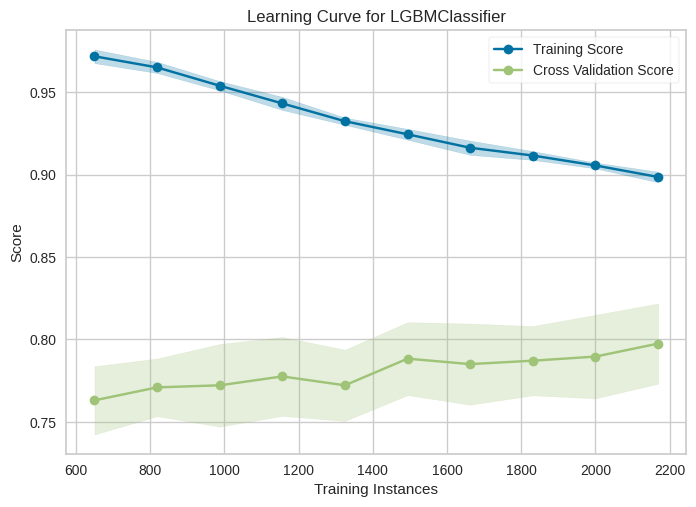

In [41]:
plot_model(final_model, plot = 'learning')

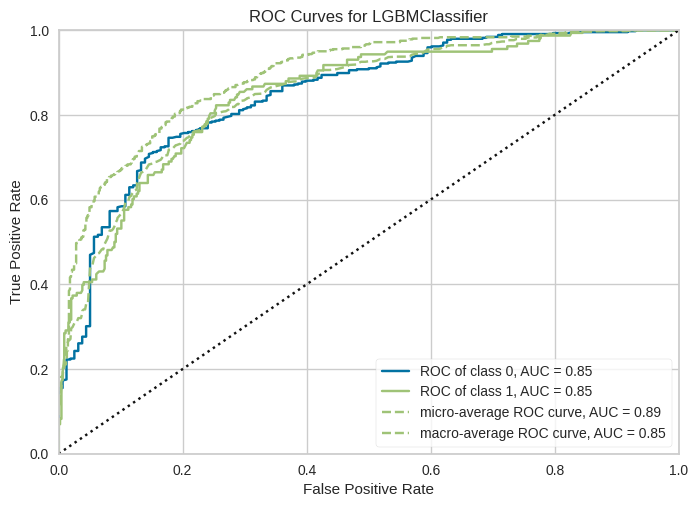

In [42]:
plot_model(final_model, plot = 'auc')

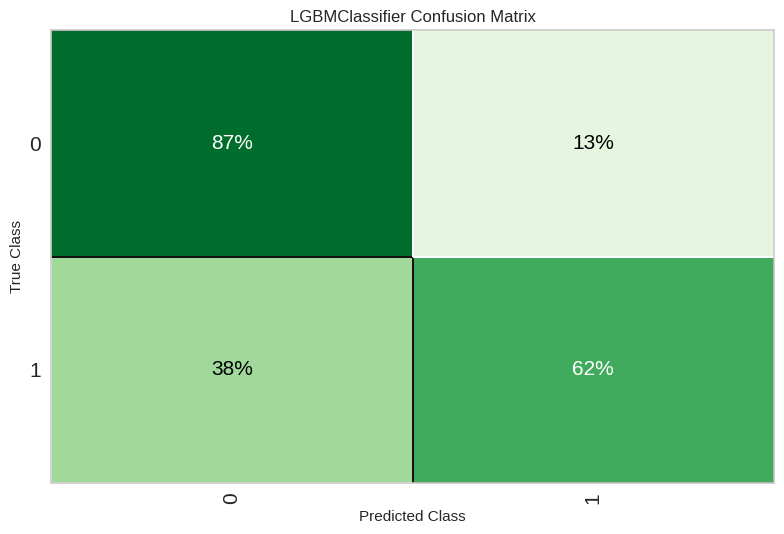

In [43]:
plot_model(final_model, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

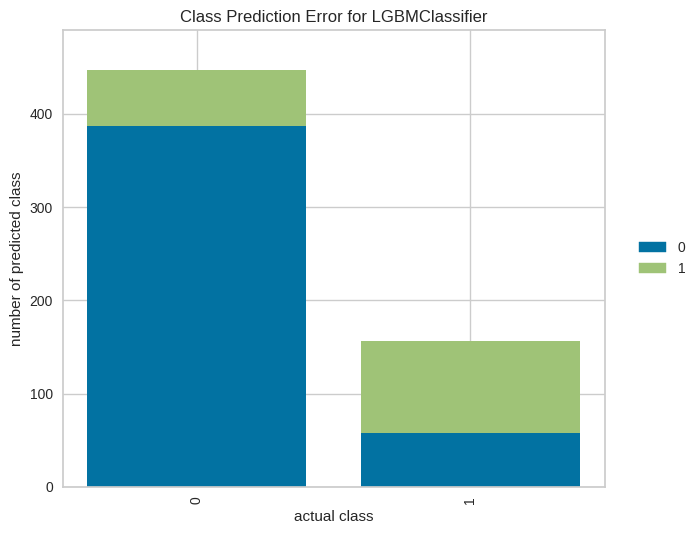

In [44]:
plot_model(final_model, plot = 'error')

### Feature importance plot

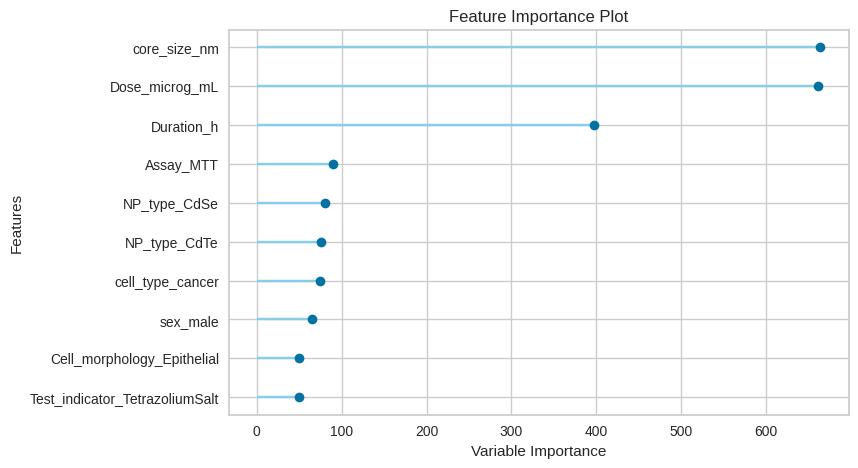

In [45]:
plot_model(final_model, plot = 'feature')

### Save the model to file

In [46]:
save_config('output/models/'+model_name+'_classification_config.cfg')

In [47]:
save_model(final_model, 'output/models/'+model_name+'_classification_model.mdl')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['nanomaterial_group',
                                                        'Coating', 'Cell_name'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='viability_class',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boo...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.